In [13]:
import torchvision_sunner.transforms as sunnertransforms
import torchvision_sunner.data as sunnerData
import torchvision.transforms as transforms
from tensorboardX import SummaryWriter


from networks_stylegan import StyleGenerator, StyleDiscriminator
from loss import gradient_penalty, R1Penalty, R2Penalty
from opts import TrainOptions, INFO

from torchvision.utils import save_image
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from torch import nn
import torch
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np
import random
import torch
import os
import sys
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

from utils import vis_batch, save_batch, collate_fn, load_config
from dataset import FashionEdgesDataset

# Set random seem for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
device = torch.cuda.current_device()


Random Seed:  999


In [2]:

# Hyper-parameters
CRITIC_ITER = 5
SAVE_SAMPLE_FREQ = 100
device = torch.cuda.current_device()
config = load_config('config.yaml')

# Create the model
start_epoch = 0
G = StyleGenerator()
D = StyleDiscriminator()
G.to(device)
D.to(device)

# Create dataset
train_set = FashionEdgesDataset(config.dataset.paths, config.resolution, only_edge = True)
loader = DataLoader(dataset=train_set,
                      batch_size=config.batch_size,
                      collate_fn = collate_fn,
                      shuffle=True)
N = len(loader)

In [3]:
for item in loader:
    break

In [11]:
item.shape[-2:]

torch.Size([1024, 712])

In [44]:
fix_z = torch.randn([2, 512]).to(device)
G(fix_z).cpu().detach().numpy().min()

-9.038253

In [36]:
resolutions = []
for path in tqdm_notebook(train_set.images_paths):
    resolutions.append(plt.imread(path).shape[:2])

In [27]:
img = np.random.randn(1024,712,3)

In [37]:
resolutions = np.array(resolutions)

In [38]:
resolutions.shape

(12140, 2)

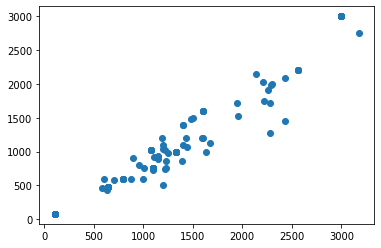

In [39]:
plt.scatter(resolutions[:,0], resolutions[:,1])